In this notebook, we will explore the data and try to find some insights.

In [2]:
import pandas as pd
# your code to load and display the data
df = pd.read_csv("data_open_nyc/Storefronts_Reported_Vacant_or_Not.csv")
# df = df[df['Reporting Year']=='2021 and 2022']
df.head()

/var/folders/lc/wd3z5xrd5s7cbp_lm8v3mkdm0000gn/T/ipykernel_21612/1250935026.py:3: DtypeWarning: Columns (4,14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_open_nyc/Storefronts_Reported_Vacant_or_Not.csv")


,Reporting Year,BOROUGH-BLOCK-LOT,PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS,BOROUGH,ZIP CODE,SOLD DATE,VACANT ON 12/31,CONSTRUCTION REPORTED,VACANT 6/30 OR DATE SOLD IF EARLIER,PRIMARY BUSINESS ACTIVITY,...,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA,NBHD
0,2021 and 2022,1001620037,10 CHATHAM SQUARE,MANHATTAN,10038,NaN,NO,NaN,NaN,FINANCE & INSURANCE,...,10038,40.714058,-73.998012,3.0,1.0,29,1001706.0,1001620037,MN27,Chinatown
1,2021 and 2022,5080470023,241 Main street,STATEN ISLAND,10307,NaN,NO,NaN,NaN,FINANCE & INSURANCE,...,10307,40.509377,-74.246762,3.0,51.0,248,5089267.0,5080470023,SI11,Charleston-Richmond Valley-Tottenville
2,2021 and 2022,5080460013,7447 AMBOY RD,STATEN ISLAND,10307,NaN,NO,NaN,NaN,OTHER,...,10307,40.509963,-74.244920,3.0,51.0,248,5107893.0,5080460013,SI11,Charleston-Richmond Valley-Tottenville
3,2021 and 2022,5080460001,7423-25 Amboy Road,STATEN ISLAND,10307,NaN,NO,NaN,NaN,FOOD SERVICES,...,10307,40.510107,-74.244057,3.0,51.0,248,5107890.0,5080460001,SI11,Charleston-Richmond Valley-Tottenville
4,2021 and 2022,5080460001,7427 Amboy Road,STATEN ISLAND,10307,NaN,YES,NaN,NaN,NO BUSINESS ACTIVITY IDENTIFIED,...,10307,40.510107,-74.244057,3.0,51.0,248,5107890.0,5080460001,SI11,Charleston-Richmond Valley-Tottenville


In [11]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [12]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [13]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
df['VACANT ON 12/31'] = df['VACANT ON 12/31'].replace({'YES': 1, 'NO': 0})

In [4]:
vacancy_by_nbhd = df.pivot_table(index=['BOROUGH 1','NTA', 'NBHD','Reporting Year'], columns='VACANT ON 12/31', aggfunc='count', fill_value=0)['BBL'].reset_index()
vacancy_by_nbhd['pct'] = vacancy_by_nbhd[1] / (vacancy_by_nbhd[0] + vacancy_by_nbhd[1]) * 100
vacancy_by_nbhd = vacancy_by_nbhd.sort_values(by=['Reporting Year', 'pct'], ascending=False)
vacancy_by_nbhd


VACANT ON 12/31,BOROUGH 1,NTA,NBHD,Reporting Year,0,1,pct
265,BROOKLYN,BK99,park-cemetery-etc-Brooklyn,2021 and 2022,16,19,54.285714
301,MANHATTAN,MN19,Turtle Bay-East Midtown,2021 and 2022,883,218,19.800182
363,QUEENS,QN03,Springfield Gardens South-Brookville,2021 and 2022,92,22,19.298246
394,QUEENS,QN19,Glendale,2021 and 2022,135,32,19.161677
319,MANHATTAN,MN25,Battery Park City-Lower Manhattan,2021 and 2022,611,144,19.072848
...,...,...,...,...,...,...,...
450,QUEENS,QN43,Bellerose,2019 and 2020,100,2,1.960784
358,QUEENS,QN02,Springfield Gardens North,2019 and 2020,57,1,1.724138
563,STATEN ISLAND,SI32,Rossville-Woodrow,2019 and 2020,57,1,1.724138
110,BRONX,BX99,park-cemetery-etc-Bronx,2019 and 2020,1,0,0.000000


In [5]:
vacancy_by_nbhd['num_storefornts'] = vacancy_by_nbhd[0] + vacancy_by_nbhd[1]
vacancy_by_nbhd = vacancy_by_nbhd[['BOROUGH 1', 'NBHD', 'Reporting Year', 'pct','num_storefornts']]

In [6]:
piv = vacancy_by_nbhd.pivot_table(index=['BOROUGH 1', 'NBHD'], columns='Reporting Year', values=['pct'], aggfunc='sum', fill_value=0)
piv = piv.reset_index()
piv.columns = ['BOROUGH', 'NBHD', '2020', '2021', '2022']
piv.head()

,BOROUGH,NBHD,2020,2021,2022
0,BRONX,Allerton-Pelham Gardens,7.142857,3.030303,2.919708
1,BRONX,Bedford Park-Fordham North,9.903382,10.679612,10.179641
2,BRONX,Belmont,9.584665,11.988304,6.521739
3,BRONX,Bronxdale,5.533597,4.545455,3.433476
4,BRONX,Claremont-Bathgate,8.482143,6.278027,6.666667


In [14]:
%%R -i piv -w 2000 -h 1000

piv %>% head()

  BOROUGH                       NBHD     2020      2021      2022
0   BRONX    Allerton-Pelham Gardens 7.142857  3.030303  2.919708
1   BRONX Bedford Park-Fordham North 9.903382 10.679612 10.179641
2   BRONX                    Belmont 9.584665 11.988304  6.521739
3   BRONX                  Bronxdale 5.533597  4.545455  3.433476
4   BRONX         Claremont-Bathgate 8.482143  6.278027  6.666667
5   BRONX                 Co-op City 9.294872  6.306306  8.333333


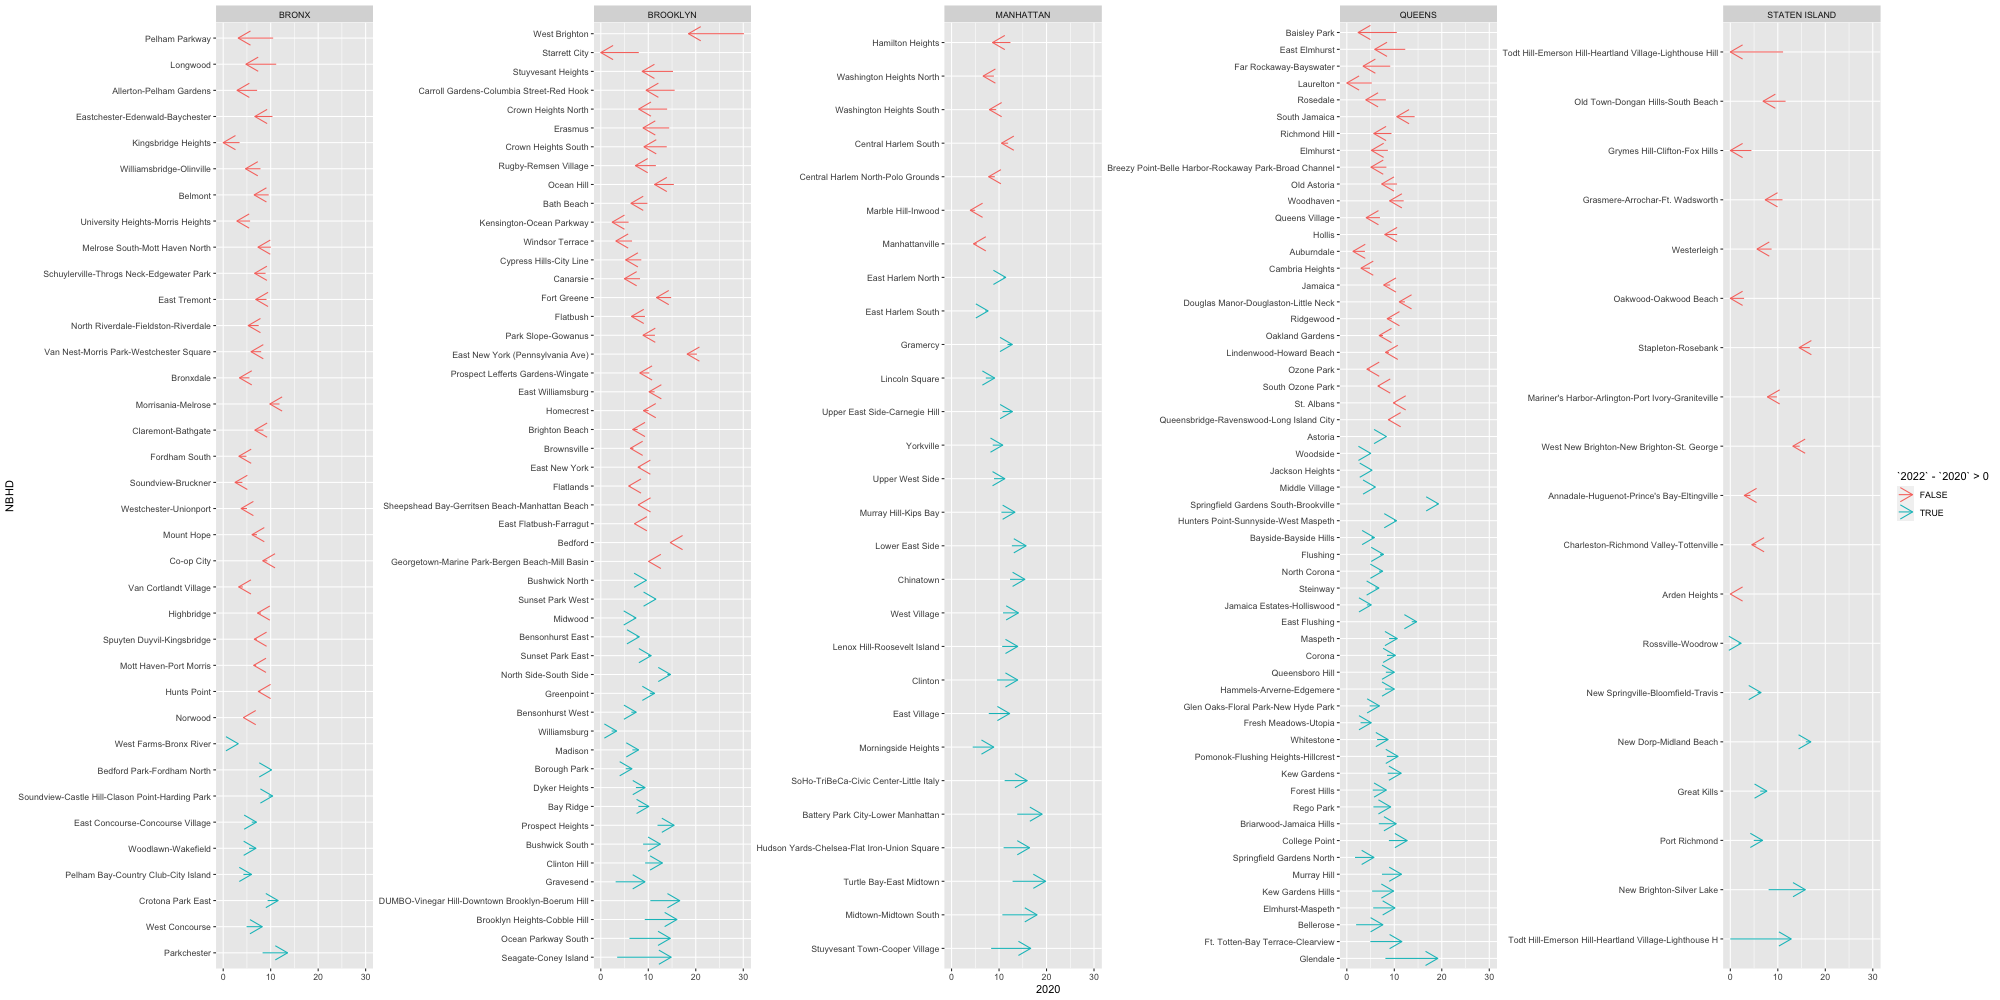

In [15]:
%%R -i piv -w 2000 -h 1000

# filter out NBHD string containing the word cemetary
piv <- piv %>% filter(!grepl('cemetery', NBHD))

# sort by diff and factor
piv <- piv %>% arrange(desc(`2022`-`2020`)) %>% mutate(NBHD = factor(NBHD, levels=NBHD))

ggplot(piv) +
    # draw geom_segment with arrow
    geom_segment(aes(x=`2020`, xend=`2022`, y=NBHD, yend=NBHD, color=`2022`-`2020` > 0), arrow = arrow(length=unit(.5, 'cm'))) +
    # geom_point(aes(x=`2020`, y=NBHD)) +
    facet_wrap(~BOROUGH, scales='free_y', nrow=1) 

In [16]:
piv['diff'] = piv['2022'] - piv['2020']
piv

,BOROUGH,NBHD,2020,2021,2022,diff
0,BRONX,Allerton-Pelham Gardens,7.142857,3.030303,2.919708,-4.223149
1,BRONX,Bedford Park-Fordham North,9.903382,10.679612,10.179641,0.276259
2,BRONX,Belmont,9.584665,11.988304,6.521739,-3.062925
3,BRONX,Bronxdale,5.533597,4.545455,3.433476,-2.100120
4,BRONX,Claremont-Bathgate,8.482143,6.278027,6.666667,-1.815476
...,...,...,...,...,...,...
188,STATEN ISLAND,Stapleton-Rosebank,16.744186,14.545455,14.482759,-2.261427
189,STATEN ISLAND,Todt Hill-Emerson Hill-Heartland Village-Light...,0.000000,0.000000,12.820513,12.820513
190,STATEN ISLAND,Todt Hill-Emerson Hill-Heartland Village-Light...,11.111111,7.142857,0.000000,-11.111111
191,STATEN ISLAND,West New Brighton-New Brighton-St. George,14.615385,12.711864,13.173653,-1.441732


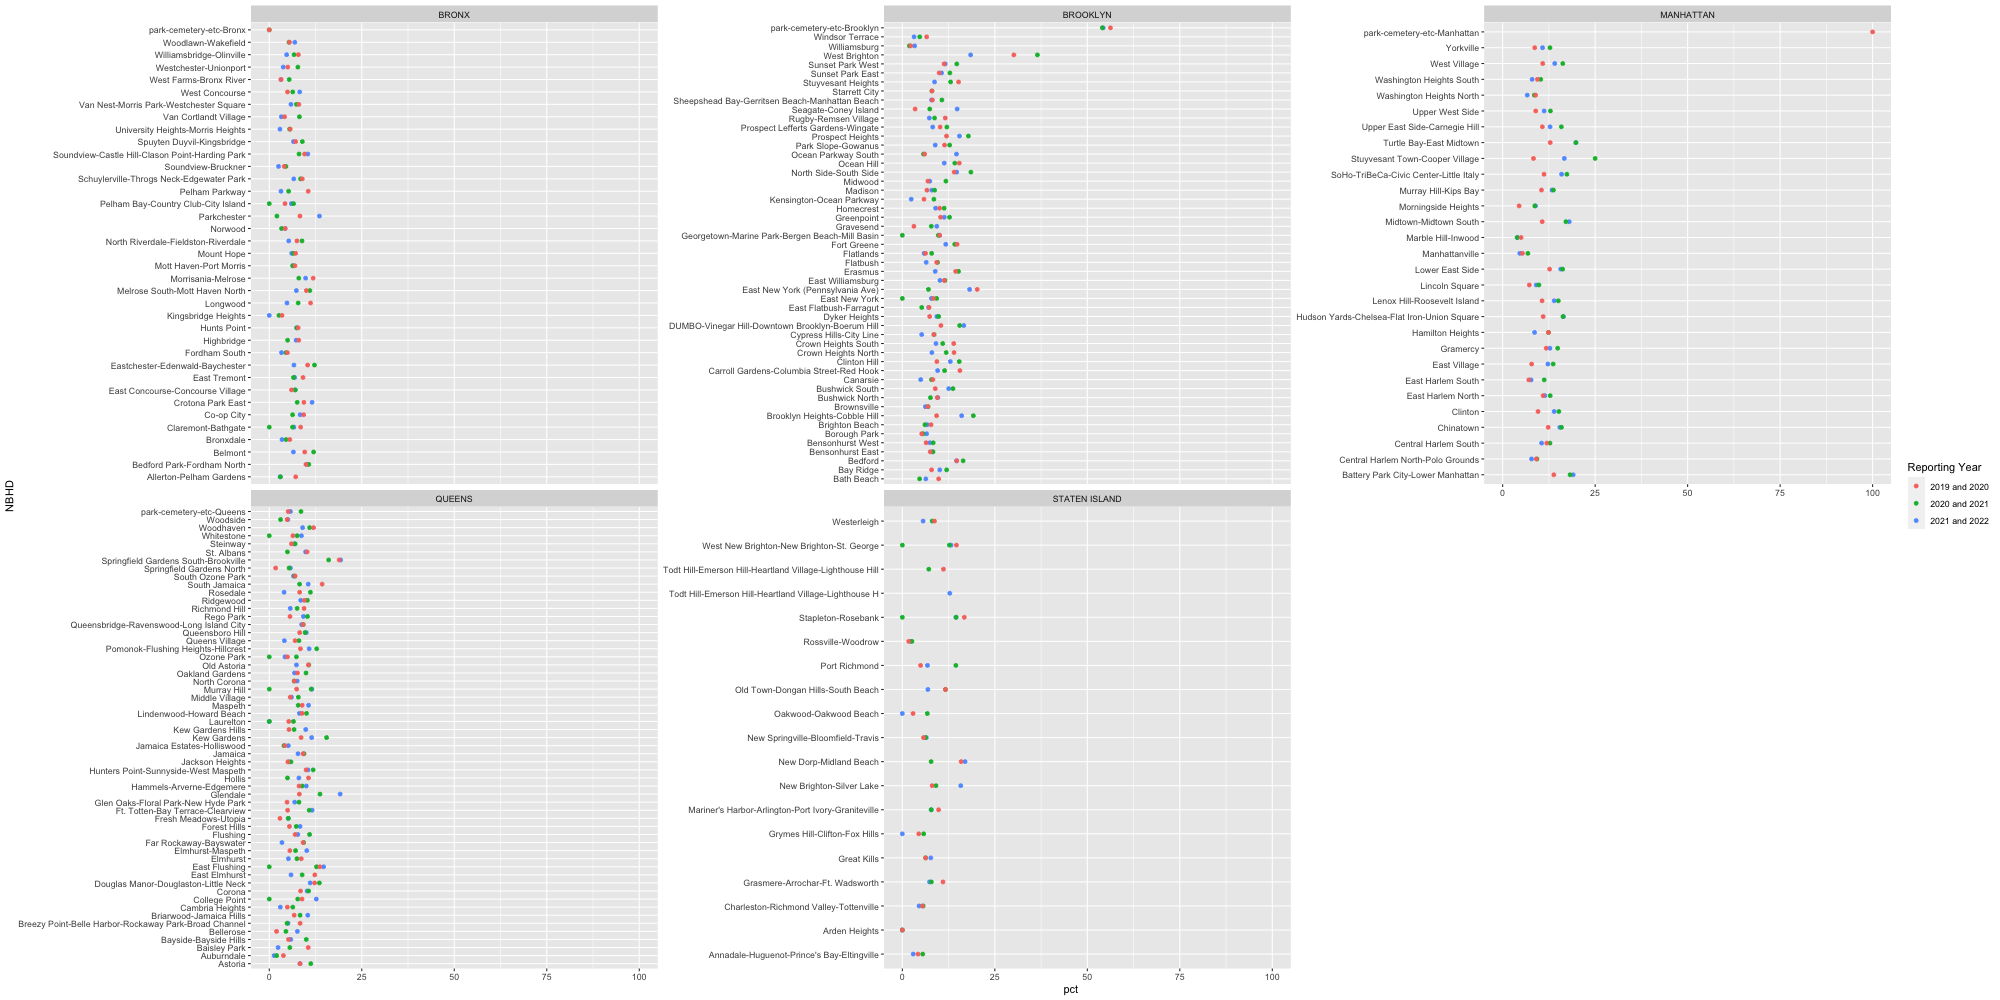

In [17]:
%%R -i vacancy_by_nbhd -w 2000 -h 1000

ggplot(vacancy_by_nbhd) +
    aes(x=pct, y=NBHD, color=`Reporting Year`) +
    geom_point() + 
    facet_wrap(~`BOROUGH 1`, scales='free_y') 